In [2]:
require(ggplot2)

In [4]:
dose=c(10.2,7.7,5.1,3.8,2.6,0)
m=c(50,49,46,48,50,49)
y=c(44,42,24,16,6,0)
p=y/m
dados=cbind(dose,m,y,p);dados

dose,m,y,p
10.2,50,44,0.8800000
7.7,49,42,0.8571429
5.1,46,24,0.5217391
3.8,48,16,0.3333333
2.6,50,6,0.1200000
0.0,49,0,0.0000000


In [5]:
dados=data.frame(dados);dados

dose,m,y,p
10.2,50,44,0.8800000
7.7,49,42,0.8571429
5.1,46,24,0.5217391
3.8,48,16,0.3333333
2.6,50,6,0.1200000
0.0,49,0,0.0000000


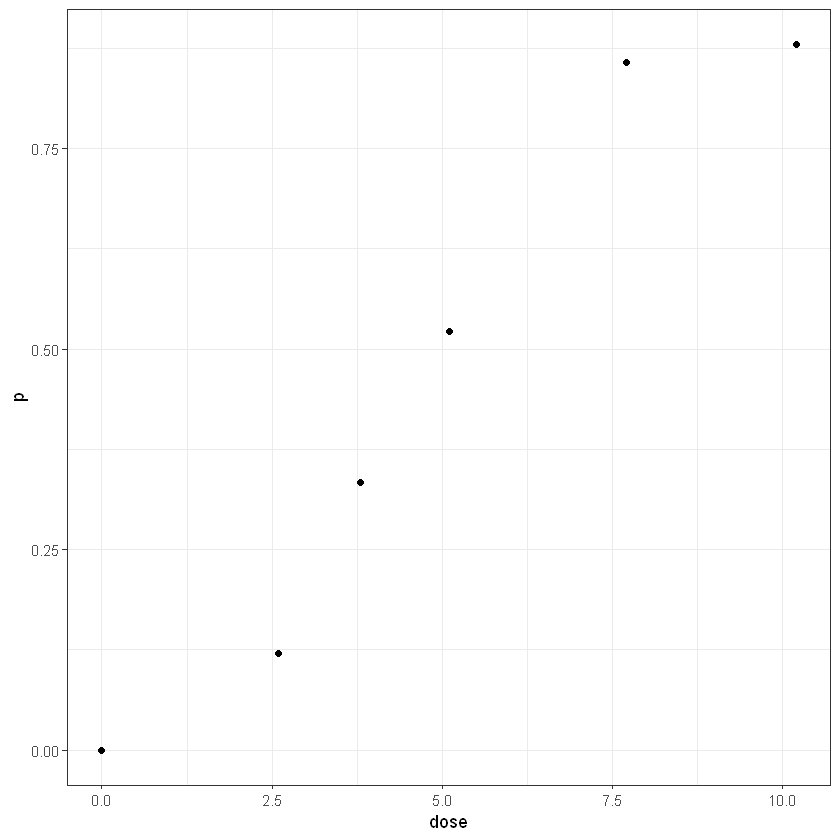

In [6]:
ggplot(dados)+aes(dose,p)+geom_point()+theme_bw()

In [8]:
resp=cbind(y,m-y)
colnames(resp)=c("Sucessos","Fracassos")
resp

Sucessos,Fracassos
44,6
42,7
24,22
16,32
6,44
0,49


In [9]:
modelo1=glm(resp~dose,family= binomial);modelo1


Call:  glm(formula = resp ~ dose, family = binomial())

Coefficients:
(Intercept)         dose  
    -3.2257       0.6051  

Degrees of Freedom: 5 Total (i.e. Null);  4 Residual
Null Deviance:	    163.7 
Residual Deviance: 10.26 	AIC: 33.48

In [14]:
summary(modelo1)


Call:
glm(formula = resp ~ dose, family = binomial())

Deviance Residuals: 
      1        2        3        4        5        6  
-1.9456   0.9145   0.7679   0.7507  -0.8157  -1.9540  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.22566    0.36992  -8.720   <2e-16 ***
dose         0.60513    0.06781   8.923   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 163.745  on 5  degrees of freedom
Residual deviance:  10.258  on 4  degrees of freedom
AIC: 33.479

Number of Fisher Scoring iterations: 5


In [15]:
modelo1$coefficients

(Intercept)        dose 
 -3.2256633   0.6051256

In [10]:
modelo1$fitted.values

1          2          3          4          5          6 
0.95010337 0.80749325 0.46517573 0.28369909 0.16079337 0.03821131

In [11]:
modelo1$fitted.values*m

1         2         3         4         5         6 
47.505169 39.567169 21.398084 13.617556  8.039668  1.872354

In [12]:
modelo1$linear.predictors

1          2          3          4          5          6 
 2.9466174  1.4338035 -0.1395230 -0.9261862 -1.6523369 -3.2256633

In [16]:
modelo1$residuals

1          2          3          4          5          6 
-1.4787571  0.3193971  0.2273565  0.2442463 -0.3023100 -1.0397294

In [18]:
cbind(p,modelo1$fitted.values)

,p,
1,0.8800000,0.95010337
2,0.8571429,0.80749325
3,0.5217391,0.46517573
4,0.3333333,0.28369909
5,0.1200000,0.16079337
6,0.0000000,0.03821131


Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

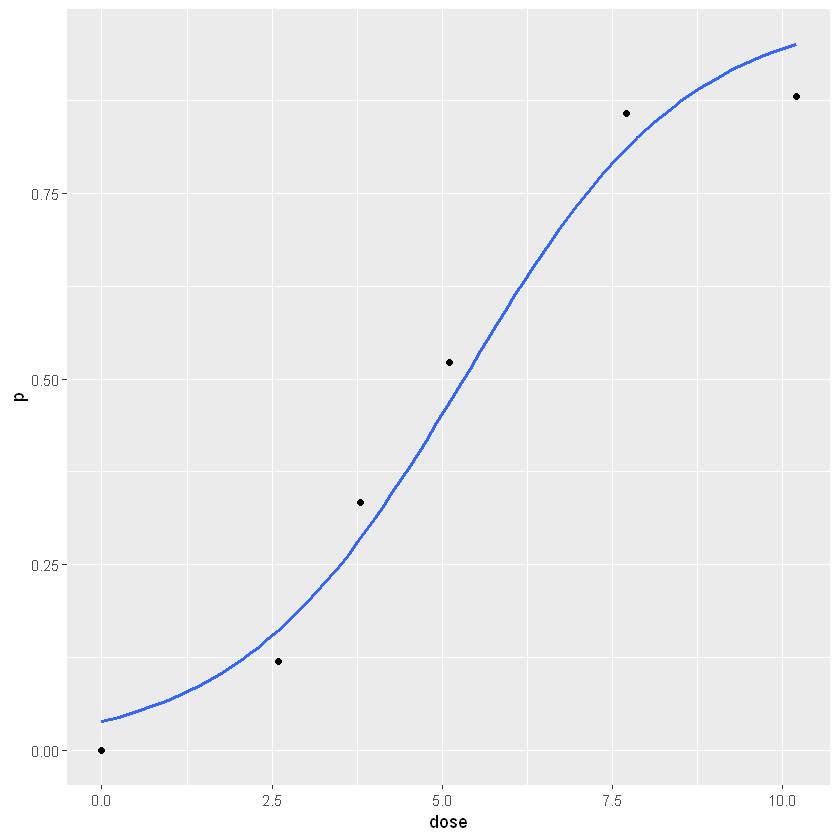

In [20]:
ggplot(dados)+aes(dose,p)+geom_point()+geom_smooth(method=glm, method.args = list(family = binomial(link="logit")),se=F)

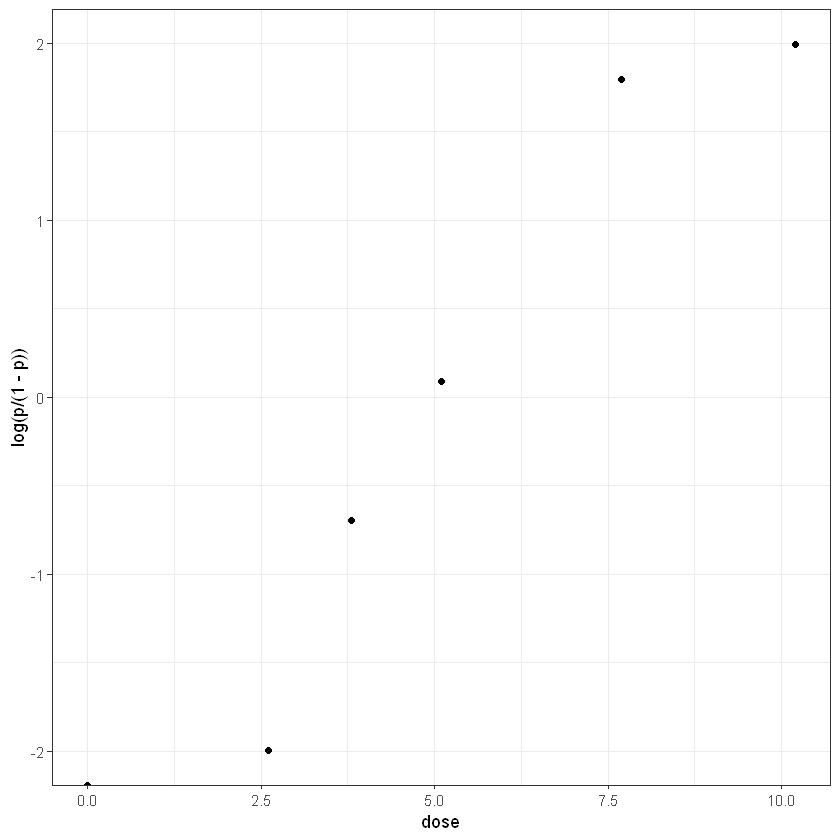

In [21]:
ggplot(dados)+aes(dose,log(p/(1-p)))+geom_point()+theme_bw()

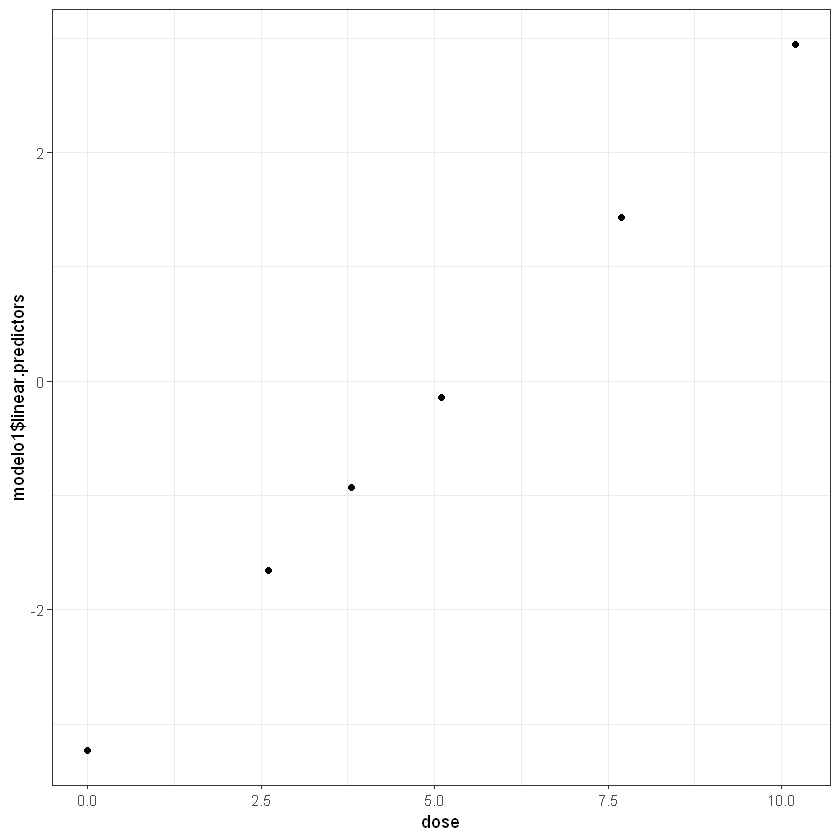

In [23]:
ggplot(dados)+aes(dose,modelo1$linear.predictors)+geom_point()+theme_bw()

In [24]:
modelo2=glm(resp~dose,family= binomial(link="probit"));modelo2


Call:  glm(formula = resp ~ dose, family = binomial(link = "probit"))

Coefficients:
(Intercept)         dose  
    -1.8778       0.3455  

Degrees of Freedom: 5 Total (i.e. Null);  4 Residual
Null Deviance:	    163.7 
Residual Deviance: 10.66 	AIC: 33.88

In [29]:
summary(modelo2)


Call:
glm(formula = resp ~ dose, family = binomial(link = "probit"))

Deviance Residuals: 
      1        2        3        4        5        6  
-1.9488   1.3194   0.9202   0.7128  -0.8693  -1.7338  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.87775    0.19485  -9.637   <2e-16 ***
dose         0.34553    0.03436  10.055   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 163.745  on 5  degrees of freedom
Residual deviance:  10.655  on 4  degrees of freedom
AIC: 33.876

Number of Fisher Scoring iterations: 5


In [30]:
modelo2$coefficients

(Intercept)        dose 
 -1.8777533   0.3455331

In [26]:
modelo2$fitted.values

1          2          3          4          5          6 
0.95018852 0.78314286 0.45401074 0.28612956 0.16369928 0.03020746

In [27]:
modelo2$fitted.values*m

1         2         3         4         5         6 
47.509426 38.374000 20.884494 13.734219  8.184964  1.480166

In [28]:
modelo2$linear.predictors

1          2          3          4          5          6 
 1.6466843  0.7828516 -0.1155345 -0.5647275 -0.9793672 -1.8777533

In [31]:
modelo2$residuals

1          2          3          4          5          6 
-0.6825992  0.2520007  0.1709067  0.1387774 -0.1769470 -0.4414242

In [32]:
cbind(p,modelo2$fitted.values)

,p,
1,0.8800000,0.95018852
2,0.8571429,0.78314286
3,0.5217391,0.45401074
4,0.3333333,0.28612956
5,0.1200000,0.16369928
6,0.0000000,0.03020746


Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

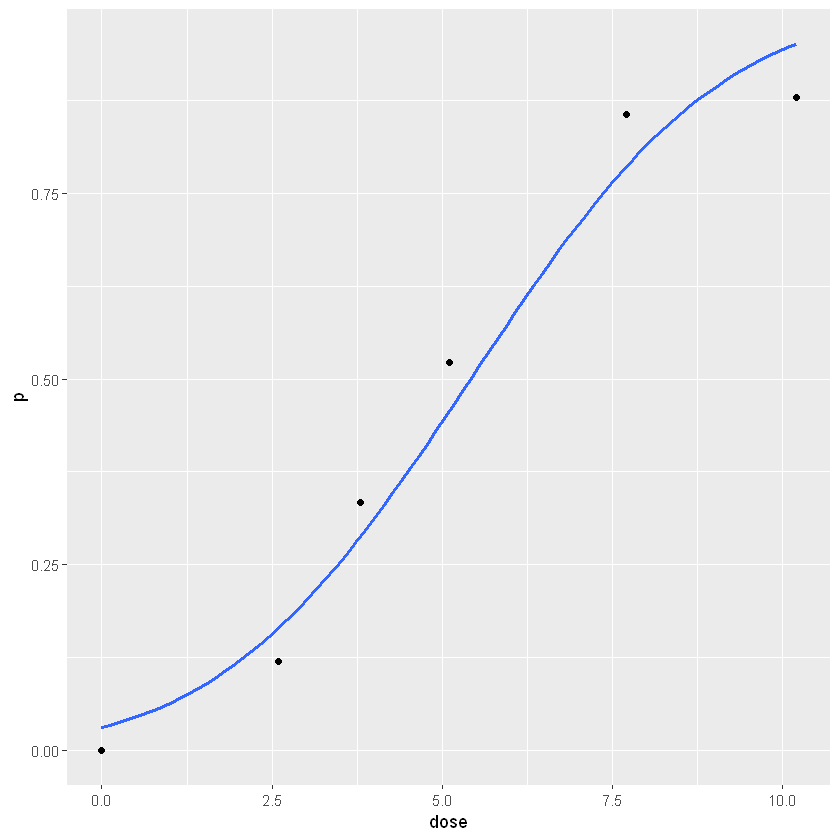

In [45]:
ggplot(dados)+aes(dose,p)+geom_point()+geom_smooth(method=glm, method.args = list(family = binomial(link="probit")),se=F)

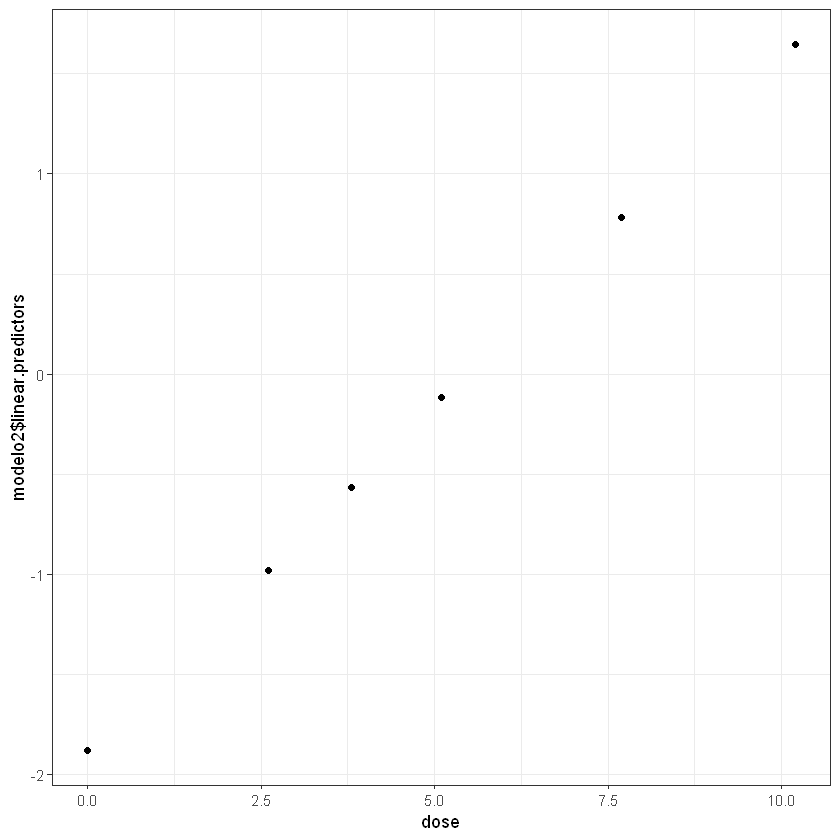

In [46]:
ggplot(dados)+aes(dose,modelo2$linear.predictors)+geom_point()+theme_bw()

In [33]:
modelo3=glm(resp~dose,family= binomial(link="cloglog"));modelo3


Call:  glm(formula = resp ~ dose, family = binomial(link = "cloglog"))

Coefficients:
(Intercept)         dose  
    -2.3973       0.3449  

Degrees of Freedom: 5 Total (i.e. Null);  4 Residual
Null Deviance:	    163.7 
Residual Deviance: 23.12 	AIC: 46.34

In [34]:
summary(modelo3)


Call:
glm(formula = resp ~ dose, family = binomial(link = "cloglog"))

Deviance Residuals: 
     1       2       3       4       5       6  
-2.074   2.198   1.522   0.710  -1.500  -2.986  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.39735    0.24515  -9.779   <2e-16 ***
dose         0.34488    0.03481   9.908   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 163.745  on 5  degrees of freedom
Residual deviance:  23.119  on 4  degrees of freedom
AIC: 46.339

Number of Fisher Scoring iterations: 7


In [38]:
modelo3$coefficients

(Intercept)        dose 
 -2.3973472   0.3448839

In [35]:
modelo3$fitted.values

1          2          3          4          5          6 
0.95340630 0.72601274 0.41028503 0.28630388 0.19987345 0.08694479

In [36]:
modelo3$fitted.values*m

1         2         3         4         5         6 
47.670315 35.574624 18.873111 13.742586  9.993672  4.260295

In [37]:
modelo3$linear.predictors

1          2          3          4          5          6 
 1.1204684  0.2582587 -0.6384394 -1.0867885 -1.5006491 -2.3973472

In [39]:
modelo3$residuals

1          2          3          4          5          6 
-0.5137987  0.3696679  0.3578694  0.1953632 -0.4476797 -1.0468903

In [40]:
cbind(p,modelo3$fitted.values)

,p,
1,0.8800000,0.95340630
2,0.8571429,0.72601274
3,0.5217391,0.41028503
4,0.3333333,0.28630388
5,0.1200000,0.19987345
6,0.0000000,0.08694479


Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

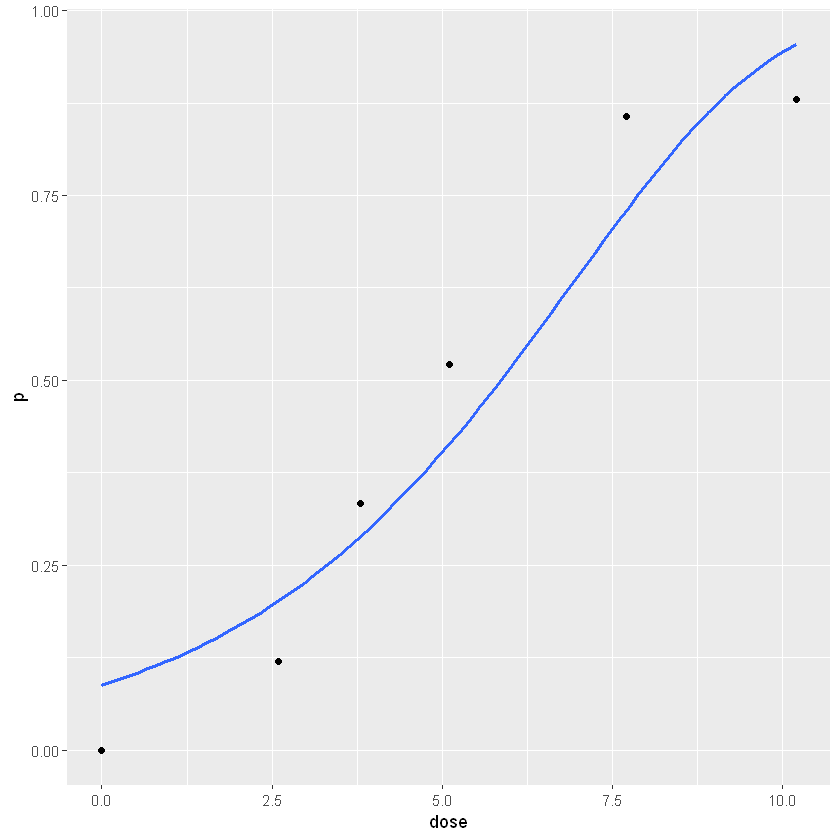

In [47]:
ggplot(dados)+aes(dose,p)+geom_point()+geom_smooth(method=glm, method.args = list(family = binomial(link="cloglog")),se=F)

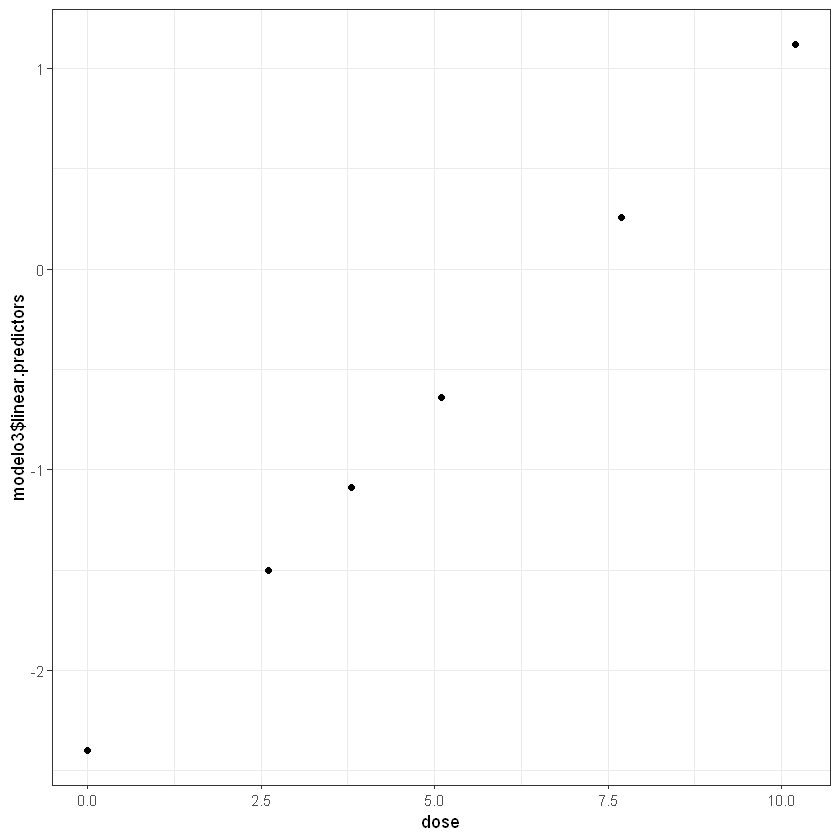

In [48]:
ggplot(dados)+aes(dose,modelo3$linear.predictors)+geom_point()+theme_bw()

In [41]:
require(MASS)

Loading required package: MASS


In [50]:
x=rbind(dose.p(modelo1,cf=1:2,p=0.5),dose.p(modelo2,cf=1:2,p=0.5),dose.p(modelo3,cf=1:2,p=0.5))
rownames(x)=c("Modelo Binomial-Logit","Modelo Binomial-Probit","Modelo Binomial-cloglog")
x

,p = 0.5:
Modelo Binomial-Logit,5.330569
Modelo Binomial-Probit,5.434366
Modelo Binomial-cloglog,5.888458


In [51]:
x=rbind(dose.p(modelo1,cf=1:2,p=0.9),dose.p(modelo2,cf=1:2,p=0.9),dose.p(modelo3,cf=1:2,p=0.9))
rownames(x)=c("Modelo Binomial-Logit","Modelo Binomial-Probit","Modelo Binomial-cloglog")
x

,p = 0.9:
Modelo Binomial-Logit,8.961591
Modelo Binomial-Probit,9.143277
Modelo Binomial-cloglog,9.369471


Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"

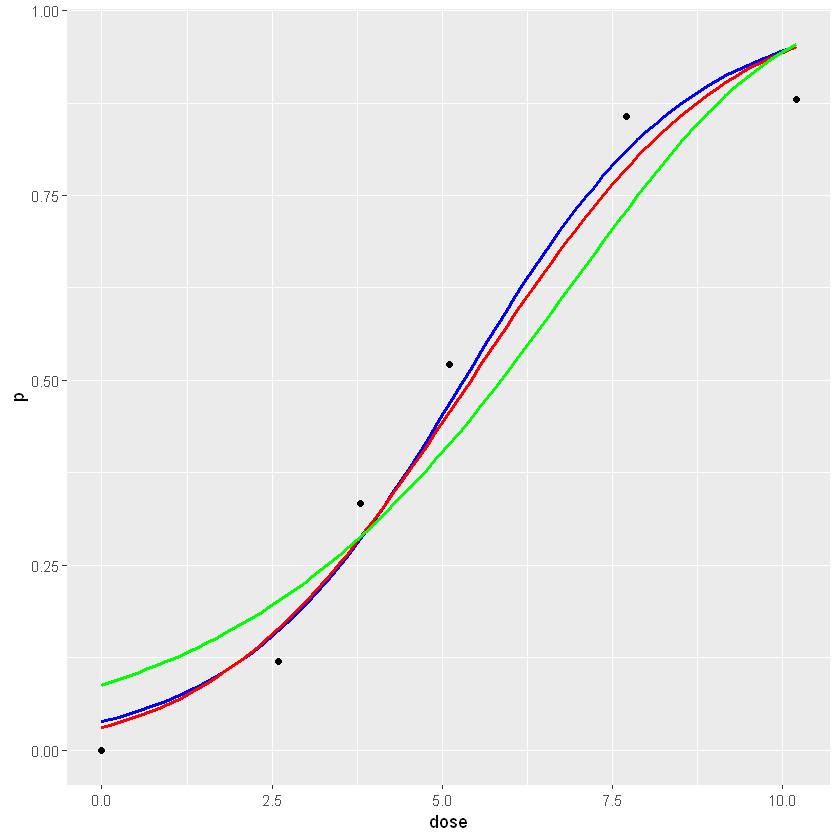

In [49]:
#Gráficos dos glms
(ggplot(dados)+aes(dose,p)+geom_point()
  +geom_smooth(color="blue",method=glm, method.args = list(family = binomial),se=F)
  +geom_smooth(color="red",method=glm, method.args = list(family = binomial(link=probit)),se=F)+
  geom_smooth(color="green",method=glm, method.args = list(family = binomial(link=cloglog)),se=F))